#Initialization

In [1]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

16:56:43


In [2]:
Direct_Detection = False
DP_Weights_Path = "/content/drive/MyDrive/YoloWeights/1C-FaceMask-DS/Run-1000e/best-908e.pt"

In [3]:
# Deletion of any non empty folder

#import shutil
#shutil.rmtree('') # put the path you want to delete

# Set initial path

%cd /content

/content


In [4]:
running_on_vm = True
#false --> running on colab
#true  --> running on vm

In [5]:
delete_previous_data_set = True
# in case of running on vm
  #false --> keep previous dataset that was downloaded from robowflow
  #true  --> delete previous dataset

In [6]:
code_exists_on_vm = False
# in case of running on vm
  #false --> download the code or modify it from github
  #true  --> dont download code from github or modify it

In [7]:
if running_on_vm:
  mainfolderpath = '/content/YOLO'
else:
  mainfolderpath = '/content'
%cd $mainfolderpath

/content/YOLO


In [8]:
import shutil
if running_on_vm:
    try:
        shutil.rmtree('yolov8/runs')
    except:
        No_Error = 0

In [9]:
if running_on_vm and (not(code_exists_on_vm)) :
    try:
        shutil.rmtree('yolov8')
    except:
        No_Error = 0

In [10]:
#MOUNT GOOGLE DRIVE
if not running_on_vm:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

In [11]:
import warnings;
warnings.filterwarnings('ignore');

In [12]:
YOLO_Conf_Thresh = .25
YOLO_Overlap_Thresh = .45
YOLO_Epochs = 1000
YOLO_Early_Stopping = 100  # 0 for no early stopping

YOLO_imgsize = 320
YOLO_batch = 32

# YOLO Info

#Importing

In [13]:
from google.colab import files
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
import numpy as np
import seaborn as sns

from __future__ import print_function, division


import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image

import csv
import requests
import xml.etree.ElementTree as ET
import cv2
import shutil
from IPython.display import clear_output

In [14]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.3 🚀 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 60.2/186.0 GB disk)


# Dataset Configuration and Initial Weights


In [15]:
#init_yolo = "yolov8n.pt"   # dummy weights for non pretrained

init_yolo = "/content/drive/MyDrive/YoloWeights/Yolo8/yolov8s.pt"   # --> from drive for Pretrained weights with "coco", network s
#init_yolo = "/content/drive/MyDrive/YoloWeights/Yolo8/yolov8n.pt"   # --> from drive for Pretrained weights with "coco" , network n

#init_yolo = "Custom path"  # --> write custom path here

In [16]:
#class_names = ['Gun']
#class_names = ['Weapon']
class_names = ['Gun' , 'LongGun']
#class_names = ['Gun' , 'LongGun' , 'PartialGun']
#class_names = ['Gun' , 'LongGun' , 'NotGun', 'PartialGun']

#class_names = ['Face']
###class_names = ['with_mask' , 'without_mask' , 'mask_weared_incorrect']  not used with small initials due to order in cofusion matrix is alphabetical (dummy is small initial to be always the last)
#class_names = ['Mask_weared_incorrect' , 'With_mask' , 'Without_mask' , ] # classes is  labeled by its number , not name, so no problem for change initials to capital

num_of_classes = len(class_names)
print(num_of_classes)

2


In [17]:
import shutil
import os

%cd $mainfolderpath

if running_on_vm and delete_previous_data_set:
    try:
        shutil.rmtree('train')
        shutil.rmtree('test')
        shutil.rmtree('valid')
        os.remove('README.dataset.txt')
        os.remove('README.roboflow.txt')
        os.remove('data.yaml')
    except:
        No_Error = 0

/content/YOLO


In [18]:
if (not running_on_vm) or (running_on_vm and delete_previous_data_set):

  #Dataset 1 class:
  if num_of_classes ==1:
    #DS1CFace- Original-320 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/MORf6KovNf?key=g7yPzfuvLS" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1CFace- Original-448 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/XKXILw9rGx?key=o7nhAtKgNu"" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1CFace- Original-640 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/qoW9MinGhV?key=E99ffmtAYt" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSW1- Original-320 YOLO V8
    !curl -L "https://app.roboflow.com/ds/CzcNIYJLgd?key=dBiWXK0z9h" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1- Original-448 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/QT6IKjvll9?key=dPXXap4dec" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1- Original-640 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/saVUljwEDp?key=Xklc4kQ7Yo" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #Other V5

    #DSW1 - 0 Original [2020] images new-2380 instances
    #!curl -L "https://app.roboflow.com/ds/IL3OuUMwc9?key=V5hHQCzhDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original [2020] images - old deleted
    #!curl -L "https://app.roboflow.com/ds/K24gaje1Br?key=rXD8tHioDa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 0 Original        [2067]
    #!curl -L "https://app.roboflow.com/ds/JUZcrDan8k?key=sUILHztMLA" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 1 Augm            [3512] - old deleted
    #!curl -L "https://app.roboflow.com/ds/c0PqTxDfiG?key=F2GVqBp9dg" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 2 Augm Blur
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSW1 - 3 Augm Noise
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS1 mini - 0 Original    [892]
    #!curl -L "https://app.roboflow.com/ds/DZXNaYaMDv?key=TFnRmq6EGK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 1 Augm        [2142]
    #!curl -L "https://app.roboflow.com/ds/Yugj7EsqVp?key=BGC5JRoVir" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 2 Augm Blur   [2142]
    #!curl -L "https://app.roboflow.com/ds/6ZwCWrb5YQ?key=AIPCtcwt1V" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 mini - 3 Augm Noise  [2142]
    #!curl -L "https://app.roboflow.com/ds/okBMatCcLc?key=sh78iKEUae" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS1 full - 0 Original    [2971]
    #!curl -L "https://app.roboflow.com/ds/d27tX4Tsyi?key=LHaM7Pz2VP" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 1 Augm        [7131]
    #!curl -L "https://app.roboflow.com/ds/2tPjmCTXdJ?key=GEEeyT7ATS" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 2 Augm Blur   [7131]
    #!curl -L "https://app.roboflow.com/ds/S3iQDOb38a?key=xaiKB6BIKE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS1 full - 3 Augm Noise  [7131]
    #!curl -L "https://app.roboflow.com/ds/j9PDHIvJ9g?key=iWZVXEn5Ba" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 2 Classes:
  if num_of_classes ==2:
    #DS2CFace- Original-320 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/OGkeH24TpC?key=OZMZCbJTWG" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS2CFace- Original-448 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/HLRiLRgBqp?key=LPmLkQxVnX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS2CFace- Original-640 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/bXjppSEkrA?key=FmrbwqP9Sw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS2CW- Original-S320 YOLO V8
    !curl -L "https://app.roboflow.com/ds/6AarhcfDby?key=tJKaLrEtrW" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS2CW- Original-S448 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/gKUAxSJ1wc?key=NIZfGQkP3R" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS2CW- Original-S640 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/1s7w9d6Au0?key=61JI3VxRPw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #Other V5

    #DS2CW- 0 Original        [2020] images new-2380 instances
    #!curl -L "https://app.roboflow.com/ds/BEsYJthyCg?key=OzELo1fx7W" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DSG2 - 0 Original        [1568]
    #!curl -L "https://app.roboflow.com/ds/b08m11oX6U?key=lv8sgLBRNq" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 1 Augm            [3778]
    #!curl -L "https://app.roboflow.com/ds/XA80St7JCu?key=jdQY4NeRDj" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 2 Augm Blur
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DSG2 - 3 Augm Noise
    #!curl -L "" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 3 Classes:
  if num_of_classes ==3:
    #DS3CFace- Original-320 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/bS4I5x4d2b?key=xu7Okqm80m" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CFace- Original-448 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/EFpFwJrbx4?key=XVp31Rfzyy" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CFace- Original-640 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/1USuUUu7v7?key=m3ojyuVcVo" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3CW- Original-320 YOLO V8
    !curl -L "https://app.roboflow.com/ds/OHqhwQhUqh?key=jv7zEZ9rmo" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CW- Original-448 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/Y2Klug1esY?key=CC9xphFjSC" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3CW- Original-640 YOLO V8
    #!curl -L "https://app.roboflow.com/ds/rstDtN35ci?key=SqtHfN898U" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #Other V5

    #DS3CW- 0 Original        [2020] images new-2380 instances
    #!curl -L "https://app.roboflow.com/ds/8VgCuytJ62?key=g3Dcrc2cx4" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    #DS3 - 0 Original Balance [1596]
    #!curl -L "https://app.roboflow.com/ds/lIbyLUIz7D?key=8C5aw7suSh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 0 Augm Balance     [3841]
    #!curl -L "https://app.roboflow.com/ds/3C1Ge2kAS4?key=VGmFElZTdm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 0 Original
    #!curl -L "https://app.roboflow.com/ds/uiNpxoDdUs?key=exz831vMZz" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 1 Augm
    #!curl -L "https://app.roboflow.com/ds/LvMGQzLES0?key=6ANGFpxV4A" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 2 Augm Blur
    #!curl -L "https://app.roboflow.com/ds/WObMXtfHfs?key=oSl4WnjUYv" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS3 - 3 Augm Noise
    #!curl -L "https://app.roboflow.com/ds/TErt9hwwip?key=R3zUnzFA2W" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  #Dataset 4 Classes:
  if num_of_classes ==4:
    #DS4 - 0 Original Balance [1599]
    !curl -L "https://app.roboflow.com/ds/LwaUHPRqG9?key=6jqGV0fnSL" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 0 Augm Balance     [3809]
    #!curl -L "https://app.roboflow.com/ds/AYtjRHgDAR?key=wDWc1Lh1E8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 0 Original
    #!curl -L "https://app.roboflow.com/ds/QHCLbNabyM?key=acVqMYm7sV" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 1 Augm
    #!curl -L "https://app.roboflow.com/ds/b9xg1NJXys?key=wEOzoBV21g" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 2 Augm Blur
    #!curl -L "https://app.roboflow.com/ds/QAHbD0HaXD?key=jkbV2eEp0f" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    #DS4 - 3 Augm Noise
    #!curl -L "https://app.roboflow.com/ds/8gmcgzNLsY?key=yWmU8PhWZa" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   904  100   904    0     0   2539      0 --:--:-- --:--:-- --:--:--  2539
100 25.2M  100 25.2M    0     0  12.8M      0  0:00:01  0:00:01 --:--:-- 18.1M
Archive:  roboflow.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/10098CG_jpg.rf.cf62bd4aef94182967f201fbe979dbbf.jpg  
 extracting: test/images/10102EP_jpg.rf.2dac0d6840ef28e9346b79832d7cf85c.jpg  
 extracting: test/images/10115CG_jpg.rf.7d7d233120fdfec6d00f9ea4ccf1dff2.jpg  
 extracting: test/images/10130CG_jpg.rf.dbfa7bda8a6ce61535d62898652182a5.jpg  
 extracting: test/images/10144DL_jpg.rf.82e5a0ac42b07e48301b44894721c686.jpg  
 extracting: test/images/10198DG_jpg.rf.bcddf754f535a55adc4eddbb851baefb.jpg  
 extracting: test/images/103

# Train Custom YOLOv8 Detector

# Train

In [19]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

16:56:55


In [20]:
os.makedirs("yolov8")

In [21]:
%%time
gopath=mainfolderpath + '/yolov8/'
%cd $gopath
try:
  shutil.rmtree(mainfolderpath + '/yolov8/runs/detect/train')
except:
  No_Error = 0

#YOLO_Epochs = 10
patience =  YOLO_Early_Stopping
dPatht =  mainfolderpath + '/data.yaml'

if not Direct_Detection:
    !yolo train model=$init_yolo data=$dPatht epochs=$YOLO_Epochs imgsz=$YOLO_imgsize batch=$YOLO_batch epochs=$YOLO_Epochs cache=True patience=$patience

/content/YOLO/yolov8
New https://pypi.org/project/ultralytics/8.3.56 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.3 🚀 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YoloWeights/Yolo8/yolov8s.pt, data=/content/YOLO/data.yaml, epochs=1000, time=None, patience=100, batch=32, imgsz=320, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, 

In [22]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

18:50:58


# Evaluate Custom YOLOv8 Detector Performance

# Evaluation Graphs

In [23]:
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'TensorBoard' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

Reusing TensorBoard on port 6006 (pid 46330), started 1 day, 22:19:36 ago. (Use '!kill 46330' to kill it.)

<IPython.core.display.Javascript object>

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

# Model Reconfiguration

In [24]:
gopath=mainfolderpath + '/yolov8/'
%cd $gopath

/content/YOLO/yolov8


In [25]:
exp = 0

In [26]:
#extract class images with "yolo format"
def extract_images(xml_path,image_Size,get_conf = False,get_all_conf = False):
  global num_of_classes
  N = num_of_classes
  file1 = open(xml_path, 'r')
  Lines = file1.readlines()
  classes = []
  X_C = []
  Y_C = []
  Width = []
  Hight = []
  Confidences = []
  ALL_Conf = []
  ctr = 0
  for l in Lines:
    ALL_Conf.append([N/(i+3*N) for i in range(N)])
    classes.append(int(l.strip().split(' ')[0]))
    X_C.append(float(l.strip().split(' ')[1])*image_Size[1])
    Y_C.append(float(l.strip().split(' ')[2])*image_Size[0])
    Width.append(float(l.strip().split(' ')[3])*image_Size[1])
    Hight.append(float(l.strip().split(' ')[4])*image_Size[0])
    if get_conf or get_all_conf:
        Confidences.append(float(l.strip().split(' ')[5]))
        ALL_Conf[ctr] = [i*float(l.strip().split(' ')[5]) for i in ALL_Conf[ctr]]
        ALL_Conf[ctr][int(l.strip().split(' ')[0])] = float(l.strip().split(' ')[5])
    ctr = ctr+1

  i = 0
  xmin = []
  xmax = []
  ymin = []
  ymax = []
  while i< len(X_C):
    xmin.append(int(X_C[i] - Width[i]/2.0))
    xmax.append(int(X_C[i] + Width[i]/2.0))
    ymin.append(int(Y_C[i] - Hight[i]/2.0))
    ymax.append(int(Y_C[i] + Hight[i]/2.0))
    i = i + 1

  if get_all_conf:
      return classes,xmin,xmax,ymin,ymax,Confidences,ALL_Conf
  if get_conf:
      return classes,xmin,xmax,ymin,ymax,Confidences
  return classes,xmin,xmax,ymin,ymax

In [27]:
def Get_Stats(Cor_List, Com_List):
      # print separate classes metrics from the report and stop before dummy:
      repo = classification_report(Cor_List,Com_List).splitlines()
      PR = []
      RE = []
      F1s = []
      print(repo[0])
      for ele in repo[2:]:
          if 'dummy' in ele:
              break
          else:
              print(ele) #print the line from report
              metrics_list = ele.split(' ')
              metrics_list = [mm for mm in metrics_list if mm]
              PR.append(float(metrics_list[1])) #classes should be of one word (No_spaces)
              RE.append(float(metrics_list[2]))
              F1s.append(float(metrics_list[3]))

      avgP = round(sum(PR)/len(PR),3)
      avgR = round(sum(RE)/len(PR),3)
      M5I = round(.99*(float(avgP) + float(avgR))/2,3)
      M9I = round(.7*(float(avgP) + float(avgR))/2,3)
      M5 = round(.9*(float(avgP) + float(avgR))/2,3)
      M9 = round(.5*(float(avgP) + float(avgR))/2,3)
      avgF = round(sum(F1s)/len(PR),3)

      idx_ctr = 0
      correct_ctr = 0
      All_ctr = 0
      for ele in Cor_List:
          if Cor_List[idx_ctr] == Com_List[idx_ctr]:#old--> and Cor_List[idx_ctr] != 'dummy':
              correct_ctr += 1
              All_ctr += 1
          else:#old-->if Cor_List[idx_ctr] != 'dummy':
              All_ctr += 1
          idx_ctr += 1


      acc = round(((correct_ctr/All_ctr)),3)
      return acc, avgP, avgR, avgF, M5I, M9I, M5, M9

In [28]:
def yolo_Matrix(valid_test, yolo_weights_path = mainfolderpath + '/yolov8/runs/detect/train/weights/best.pt'):# valid_test = 0 ->validation///valid_test = 1 ->test
      global exp
      test_path = ""
      if valid_test == 0:
          test_path = mainfolderpath + '/valid/images'
      elif valid_test == 1:
          test_path = mainfolderpath + '/test/images'


      exp = exp + 1
      if exp ==1:
            exp_path = mainfolderpath + '/yolov8/runs/detect/predict'
            labels_path = mainfolderpath + '/yolov8/runs/detect/predict/labels'
      else:
            exp_path = mainfolderpath + '/yolov8/runs/detect/predict' + str(exp)
            labels_path = mainfolderpath + '/yolov8/runs/detect/predict' + str(exp) + '/labels'

      go_path = mainfolderpath + '/yolov8'
      %cd $go_path
      !yolo predict model=$yolo_weights_path imgsz=$YOLO_imgsize conf=0.4 source=$test_path save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh
      %cd $mainfolderpath


      original_classes = []
      pred_classes = []
      for img_name in os.listdir(test_path):
          file_path = os.path.join(test_path,img_name)
          img_shape = cv2.imread(file_path).shape
          txt_path = ""
          if valid_test == 0:
              txt_path = os.path.join(mainfolderpath + '/valid/labels',img_name[:-3]+"txt")
          elif valid_test == 1:
              txt_path = os.path.join(mainfolderpath + '/test/labels',img_name[:-3]+"txt")
          actual_classes,actual_xmin,actual_xmax,actual_ymin,actual_ymax = extract_images(txt_path,img_shape)



          txt_path = os.path.join(labels_path,img_name[:-3]+"txt")
          yolo_classes = []
          try:
            yolo_classes,yolo_xmin,yolo_xmax,yolo_ymin,yolo_ymax,yolo_confidences,Image_all_YOlO_Confs = extract_images(txt_path,img_shape,True, True)
          except:
            yolo_classes,yolo_xmin,yolo_xmax,yolo_ymin,yolo_ymax,yolo_confidences,Image_all_YOlO_Confs = [],[],[],[],[],[],[]

          Final_classes = []
          i = 0
          isub_ctr = -1
          original_im = cv2.imread(file_path)
          for sub_img in yolo_xmin:
              isub_ctr = isub_ctr + 1
              clear_output(wait=False)
              Yolo_class = int(yolo_classes[i])
              Final_class = int(Yolo_class)
              Final_classes.append(Final_class)
              i = i+1

          Not_Found_actual = []
          for act_cls in actual_classes:
              # check if the actual class is in the Final_classes
              # and delete it if so:
              ind_ctr = 0
              found = False
              while ind_ctr < len(Final_classes):
                  if act_cls == Final_classes[ind_ctr] and act_cls != num_of_classes:
                      original_classes.append(class_names[act_cls])
                      pred_classes.append(class_names[Final_classes[ind_ctr]])
                      del Final_classes[ind_ctr]
                      found = True
                      break
                  ind_ctr = ind_ctr + 1
              if not found:
                  if act_cls != num_of_classes:
                      Not_Found_actual.append(act_cls)

          rem_act_ctr = 0
          rem_pre_ctr = 0
          while rem_act_ctr < len(Not_Found_actual):
              if Not_Found_actual[rem_act_ctr]!= num_of_classes:
                  original_classes.append(class_names[Not_Found_actual[rem_act_ctr]])
                  if rem_pre_ctr < len(Final_classes) and Final_classes[rem_pre_ctr] != num_of_classes:
                      pred_classes.append(class_names[Final_classes[rem_pre_ctr]])
                      del Final_classes[rem_pre_ctr]
                  elif rem_pre_ctr < len(Final_classes):
                      pred_classes.append('dummy')
                      del Final_classes[rem_pre_ctr]
                  else:
                      pred_classes.append('dummy')
              else:
                  if rem_pre_ctr < len(Final_classes) and Final_classes[rem_pre_ctr] != num_of_classes:
                      original_classes.append("dummy")
                      pred_classes.append(class_names[Final_classes[rem_pre_ctr]])
                      del Final_classes[rem_pre_ctr]
                  elif rem_pre_ctr < len(Final_classes):
                      del Final_classes[rem_pre_ctr]

              rem_act_ctr = rem_act_ctr + 1
              rem_pre_ctr = rem_pre_ctr + 1
          # Actual is empty now#
          for ele in Final_classes:
              if ele != num_of_classes:
                  original_classes.append("dummy")
                  pred_classes.append(class_names[ele])
    ##########################################################################################
      labels = class_names
      labels.append('dummy')
      cm_labels = np.unique(labels)
      cm_array = confusion_matrix(original_classes, pred_classes)
      cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
      ax = sns.heatmap(cm_array_df, annot=True, cmap='Blues')
      ax.set_title('Confusion Matrix\n\n');
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values');
      plt.show()

      cm_labels = np.unique(labels)
      cm_array = confusion_matrix(original_classes, pred_classes, normalize = "true")
      cm_array_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
      ax = sns.heatmap(cm_array_df, annot=True, cmap='Blues')
      ax.set_title('Normalized Confusion Matrix\n\n');
      ax.set_xlabel('\nPredicted Values')
      ax.set_ylabel('Actual Values');
      plt.show()

      accuracy,AVG_Precision,AVG_Recall,AVG_F1,MAP50in,MAP95in,MAP50,MAP95=Get_Stats(original_classes,pred_classes)
      print('Accuracy = ', str(accuracy))
      print('Average Precisison = ', str(AVG_Precision))
      print('Average Recall = ', str(AVG_Recall))
      print('Average F1-Score = ', str(AVG_F1))
      try:
            shutil.rmtree(exp_path) # Folder for test images confusion matrix
            exp = exp -1
      except:
            No_Error = 0

#Validate

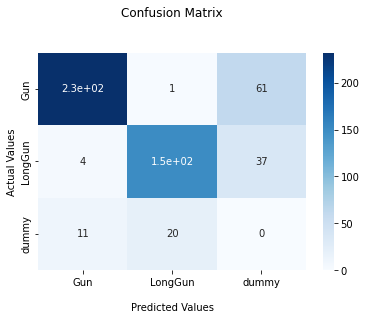

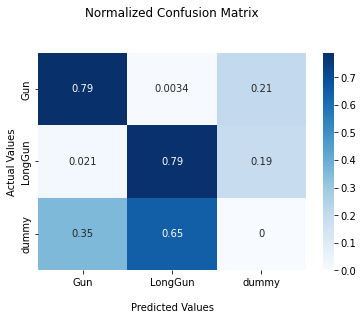

              precision    recall  f1-score   support
         Gun       0.94      0.79      0.86       294
     LongGun       0.88      0.79      0.83       191
Accuracy =  0.74
Average Precisison =  0.91
Average Recall =  0.79
Average F1-Score =  0.845


In [29]:
if not Direct_Detection:
    yolo_Matrix(0)
else:
    yolo_Matrix(valid_test=0,yolo_weights_path  = DP_Weights_Path)

#Test

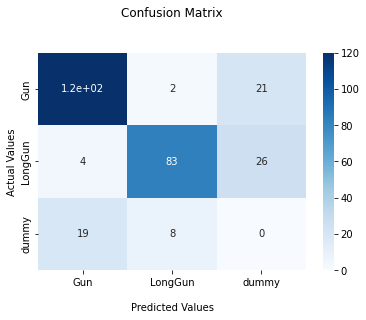

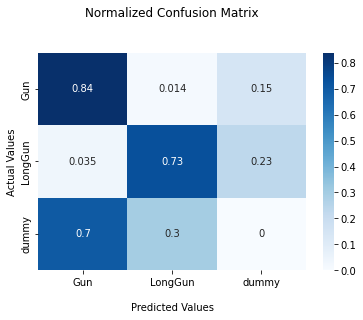

              precision    recall  f1-score   support
         Gun       0.84      0.84      0.84       143
     LongGun       0.89      0.73      0.81       113
Accuracy =  0.717
Average Precisison =  0.865
Average Recall =  0.785
Average F1-Score =  0.825


In [30]:
if not Direct_Detection:
    yolo_Matrix(1)
else:
    yolo_Matrix(valid_test=1,yolo_weights_path  = DP_Weights_Path)

# Show images

In [31]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
import shutil
try:
  if running_on_vm:
    shutil.rmtree('/content/YOLO/yolov8/runs/detect/predict')
    shutil.rmtree('/content/YOLO/yolov8/runs/detect/predict2')
    shutil.rmtree('/content/YOLO/yolov8/runs/detect/predict3')

  else:
    shutil.rmtree('/content/yolov8/runs/detect/predict')
    shutil.rmtree('/content/yolov8/runs/detect/predict2')
    shutil.rmtree('/content/yolov8/runs/detect/predict3')


except:
  No_Error = 0

if running_on_vm:
  %cd /content/YOLO/yolov8/
else:
  %cd /content/yolov8/

if not Direct_Detection:
    !yolo predict model=runs/detect/train/weights/best.pt imgsz=$YOLO_imgsize conf=0.4 source=../train/images save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh
    !yolo predict model=runs/detect/train/weights/best.pt imgsz=$YOLO_imgsize conf=0.4 source=../valid/images save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh
    !yolo predict model=runs/detect/train/weights/best.pt imgsz=$YOLO_imgsize conf=0.4 source=../test/images save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh
else:
    !yolo predict model=$DP_Weights_Path imgsz=$YOLO_imgsize conf=0.4 source=../train/images save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh
    !yolo predict model=$DP_Weights_Path imgsz=$YOLO_imgsize conf=0.4 source=../valid/images save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh
    !yolo predict model=$DP_Weights_Path imgsz=$YOLO_imgsize conf=0.4 source=../test/images save_txt=True save_conf=True conf=$YOLO_Conf_Thresh iou=$YOLO_Overlap_Thresh


/content/YOLO/yolov8
Ultralytics 8.3.3 🚀 Python-3.8.16 torch-1.13.1+cu117 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 186 layers, 9,828,438 parameters, 0 gradients, 23.3 GFLOPs

image 1/1399 /content/YOLO/yolov8/../train/images/10002DL_jpg.rf.71d5d91ae5f3e7a58975151bd5c943ec.jpg: 320x320 2 LongGuns, 17.5ms
image 2/1399 /content/YOLO/yolov8/../train/images/10025DL_jpg.rf.4bca082ff73c4c3053f66d3b2a972c1d.jpg: 320x320 2 LongGuns, 9.3ms
image 3/1399 /content/YOLO/yolov8/../train/images/10030DL_jpg.rf.984fa55539cd7ce0e80566a2873773f6.jpg: 320x320 1 LongGun, 9.0ms
image 4/1399 /content/YOLO/yolov8/../train/images/10031DL_jpg.rf.b0bd372137869c147ed5380faf3fcc51.jpg: 320x320 1 LongGun, 8.8ms
image 5/1399 /content/YOLO/yolov8/../train/images/10032DL_jpg.rf.4280f974d33654fc351f594f0468c9f7.jpg: 320x320 1 LongGun, 11.6ms
image 6/1399 /content/YOLO/yolov8/../train/images/10057CL_jpg.rf.44d79ea1c826420af611973fe32ec7df.jpg: 320x320 1 Gun, 1 LongGun, 8.7ms
image 7/1399 /content/YOLO/yolov8/..

In [32]:
import os

path = mainfolderpath + '/SmallImages'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)

path = mainfolderpath + '/SmallImages/train/frames'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)
path = mainfolderpath + '/SmallImages/train/classes'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)
"""
path = mainfolderpath + '/SmallImages/train'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)
"""
path = mainfolderpath + '/SmallImages/valid'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)

path = mainfolderpath + '/SmallImages/test'
if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)
    os.makedirs(path)

In [33]:
k = -1

In [34]:
for file_name in os.listdir(mainfolderpath + '/yolov8/runs/detect/predict'):
  if file_name == 'labels':
      continue
  k = k+1
  file_path = os.path.join(mainfolderpath + '/train/images',file_name)
  img_shape = cv2.imread(file_path).shape
  txt_path = os.path.join(mainfolderpath + '/yolov8/runs/detect/predict/labels',file_name[:-3]+"txt")
  #path = mainfolderpath + '/SmallImages/train/'
  path = mainfolderpath + '/SmallImages/train/frames/'
  path2 = mainfolderpath + '/SmallImages/train/classes/'

  cv2.imwrite(path + '/' + str(k) + '_.jpg', cv2.imread(mainfolderpath + '/yolov8/runs/detect/predict/'+ file_name))

  try:
    classes,xmin,xmax,ymin,ymax = extract_images(txt_path,img_shape)
  except:
    continue
  i = 0
  for sub_img in xmin:
    im = cv2.imread(file_path)
    im = im [ymin[i]:ymax[i],xmin[i]:xmax[i],:]
    down_points = (240, 240)
    im = cv2.resize(im, down_points, interpolation= cv2.INTER_LINEAR)
    #cv2.imwrite(path + '/' + str(k) + '_' + str(i) + '.jpg', im)
    cv2.imwrite(path2 + '/' + str(k) + '_' + str(i) + '.jpg', im)
    i = i+1


In [35]:
for file_name in os.listdir(mainfolderpath + '/yolov8/runs/detect/predict2'):
  if file_name == 'labels':
      continue
  k = k+1
  file_path = os.path.join(mainfolderpath + '/valid/images',file_name)
  img_shape = cv2.imread(file_path).shape
  txt_path = os.path.join(mainfolderpath + '/yolov8/runs/detect/predict2/labels',file_name[:-3]+"txt")
  path = mainfolderpath + '/SmallImages/valid/'
  cv2.imwrite(path + '/' + str(k) + '_.jpg', cv2.imread(mainfolderpath + '/yolov8/runs/detect/predict2/'+ file_name))
  try:
    classes,xmin,xmax,ymin,ymax = extract_images(txt_path,img_shape)
  except:
    continue
  i = 0
  for sub_img in xmin:
    im = cv2.imread(file_path)
    im = im [ymin[i]:ymax[i],xmin[i]:xmax[i],:]
    down_points = (240, 240)
    im = cv2.resize(im, down_points, interpolation= cv2.INTER_LINEAR)
    cv2.imwrite(path + '/' + str(k) + '_' + str(i) + '.jpg', im)
    i = i+1

In [36]:
for file_name in os.listdir(mainfolderpath + '/yolov8/runs/detect/predict3'):
  if file_name == 'labels':
      continue
  k = k+1
  file_path = os.path.join(mainfolderpath + '/test/images',file_name)
  img_shape = cv2.imread(file_path).shape
  txt_path = os.path.join(mainfolderpath + '/yolov8/runs/detect/predict3/labels',file_name[:-3]+"txt")
  path = mainfolderpath + '/SmallImages/test/'
  cv2.imwrite(path + '/' + str(k) + '_.jpg', cv2.imread(mainfolderpath + '/yolov8/runs/detect/predict3/'+ file_name))
  try:
    classes,xmin,xmax,ymin,ymax = extract_images(txt_path,img_shape)
  except:
    continue
  i = 0
  for sub_img in xmin:
    im = cv2.imread(file_path)
    im = im [ymin[i]:ymax[i],xmin[i]:xmax[i],:]
    down_points = (240, 240)
    im = cv2.resize(im, down_points, interpolation= cv2.INTER_LINEAR)
    cv2.imwrite(path + '/' + str(k) + '_' + str(i) + '.jpg', im)
    i = i+1

In [37]:
#shutil.make_archive(mainfolderpath + "/YOLO-IMAGES-Train", 'zip', mainfolderpath + '/SmallImages/train')
shutil.make_archive(mainfolderpath + "/YOLO-IMAGES-Train-frames", 'zip', mainfolderpath + '/SmallImages/train/frames')
shutil.make_archive(mainfolderpath + "/YOLO-IMAGES-Train-classes", 'zip', mainfolderpath + '/SmallImages/train/classes')
shutil.make_archive(mainfolderpath + "/YOLO-IMAGES-Valid", 'zip', mainfolderpath + '/SmallImages/valid')
shutil.make_archive(mainfolderpath + "/YOLO-IMAGES-Test", 'zip', mainfolderpath + '/SmallImages/test')

'/content/YOLO/YOLO-IMAGES-Test.zip'

In [ ]:
import glob
from IPython.display import Image, display

globpath=''
resultlabelpath=''

if running_on_vm:
  globpath='/content/YOLO/yolov8/runs/detect/predict/*.jpg'
  resultlabelpath='/content/YOLO/yolov8/runs/detect/predict/labels/'
else:
  globpath='/content/yolov8/runs/detect/predict/*.jpg'
  resultlabelpath='/content/yolov8/runs/detect/predict/labels/'

for imageName in glob.glob(globpath): #assuming JPG
    image_result = "found instance of classes:  "
    try:
      with open(resultlabelpath + imageName.split('/')[-1][:-3]+'txt') as infile:
        lines = infile.readlines()
      for line in line:
        print(line)
        image_result = image_result + class_names[int(line.split(" ")[0])] + "  ,  "
    except:
      image_result = "No instances"
    #print(image_result)
    display(Image(filename=imageName))
    print("\n")

In [39]:
import datetime
tme = datetime.datetime.utcnow()+datetime.timedelta(hours=2)
print(tme.strftime('%H:%M:%S'))

18:52:45
